# Лабороторная работа 1. Вариант 3.
Cортировка слиянием, Шейкер-Сортировка, Сортировка простыми вставками

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from faker import Faker
from random import choice
from string import ascii_lowercase
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Массив данных бухгалтерии:  ФИО служащего, должность, подразделение, месячная зарплата (сравнение по полям – подразделение, ФИО служащего,  зарплата)

## Генератор

In [2]:
sizes_of_dataset = np.array(
    [100, 500, 1000, 5000, 10000, 30000, 50000, 100000]) #Размер данных

In [3]:
#Генератор Датасетов
random_position = np.array(['junior', 'middle', 'senior'])
fake = Faker('ru_RU')

for size_of_data in sizes_of_dataset:
    with open(f'Data/dataset{size_of_data}.csv', 'w') as file:
        file.write('ФИО' + ',' + 'Должность' + ',' + 'Подразделение' + ',' +
                   'Зарплата' + '\n')
        for stri in range(size_of_data):
            unit = ''.join(choice(ascii_lowercase) for i in range(5))
            file.write(fake.last_name() + ' ' + fake.first_name() + ' ' +
                       fake.middle_name() + ',' +
                       np.random.choice(random_position) + ',' + unit + ',' +
                       str(np.random.randint(15000, 50000)) + '\n')

In [5]:
pd.read_csv('Data\dataset100.csv', encoding='cp1251')

,ФИО,Должность,Подразделение,Зарплата
0,Туров Фадей Теймуразович,senior,zndcr,33223
1,Шашков Ярополк Иосипович,junior,zapuu,22978
2,Носова Евдоким Давыдович,middle,mgbua,24573
3,Филиппова Лука Ниловна,middle,ehjsc,42108
4,Волков Иннокентий Игоревич,middle,ltpxm,23487
...,...,...,...,...
95,Яковлев Гаврила Игоревна,junior,ohher,18403
96,Иванов Георгий Болеславовна,senior,yrqsh,33283
97,Лобанов Бажен Марсович,senior,ezuzr,21312
98,Кириллова Лазарь Ильинична,senior,oaoni,33363


## Класс и перегрузка операторов 

In [7]:
#Класс
class Accounting:
    """ 
    Класс для составления массив данных бухгалтерии.
      
    Attributes:  
        Name (str): ФИО служащего
        Position (str): Должность
        Place (str): Подразделение
        Salary (int): Зарплата
    """
    def __init__(self, name, position, place, salary):
        self.name = name
        self.position = position
        self.place = place
        self.salary = salary

    def __gt__(self, other):
        """ 
        Перегрузка оператора "больше >" для класса Accounting. 
  
        Параметры: 
           self (Countuing): Исходный объект класса  
           other (Counting): Объект класса, с которым будет производиться сравнение.   
           
        Возвращаемое значение: Bool
            True - исходный объект класса больше чем сравниваемый
            False - исходный объект класса не больше (меньше или равен) чем сравниваемый
        """
        if self.place > other.place:  #Проверяем Подразделение
            return True
        elif self.place == other.place:  #Если подразделения равны, сравниваем ФИО
            if self.name > other.name:
                return True
            elif self.name == other.name:  #Если ФИО равны, сравниваем зарплату
                if self.salary > other.salary:
                    return True
        return False

    def __ge__(self, other):
        """ 
        Перегрузка оператора "больше или равно >=" для класса Accounting. 
  
        Параметры: 
           self (Countuing): Исходный объект класса  
           other (Counting): Объект класса, с которым будет производиться сравнение.   
           
        Возвращаемое значение: Bool
            True - исходный объект класса больше  чем сравниваемый или равен ему
            False - исходный объект класса меньше чем сравниваемый
        """
        if self.place >= other.place:
            return True
        elif self.place == other.place:
            if self.name >= other.name:
                return True
            elif self.name == other.name:
                if self.salary >= other.salary:
                    return True
        return False

    def __le__(self, other):
        """ 
        Перегрузка оператора "меньше или равно <=" для класса Accounting. 
  
        Параметры: 
           self (Countuing): Исходный объект класса  
           other (Counting): Объект класса, с которым будет производиться сравнение.   
           
        Возвращаемое значение: Bool
            True - исходный объект класса меньше  чем сравниваемый или равен ему
            False - исходный объект класса больше чем сравниваемый
        """
        if self.place < other.place:
            return True
        elif self.place == other.place:
            if self.name < other.name:
                return True
            elif self.name == other.name:
                if self.salary < other.salary:
                    return True
        return False

    def __lt__(self, other):
        """ 
        Перегрузка оператора "меньше <" для класса Accounting. 
  
        Параметры: 
           self (Countuing): Исходный объект класса  
           other (Counting): Объект класса, с которым будет производиться сравнение.   
           
        Возвращаемое значение: Bool
            True - исходный объект класса меньше чем сравниваемый
            False - исходный объект класса не меньше  чем сравниваемый
        """
        if self.place <= other.place:
            return True
        elif self.place == other.place:
            if self.name <= other.name:
                return True
            elif self.name == other.name:
                if self.salary <= other.salary:
                    return True
        return False

    def __repr__(self):
        """
        Строковое представление объекта
        
        self (Counting): Исходный объект класса
        """
        return '%r' % self.__dict__

In [8]:
help(Accounting)

Help on class Accounting in module __main__:

class Accounting(builtins.object)
 |  Accounting(name, position, place, salary)
 |  
 |  Класс для составления массив данных бухгалтерии.
 |    
 |  Attributes:  
 |      Name (str): ФИО служащего
 |      Position (str): Должность
 |      Place (str): Подразделение
 |      Salary (int): Зарплата
 |  
 |  Methods defined here:
 |  
 |  __ge__(self, other)
 |      Перегрузка оператора "больше или равно >=" для класса Accounting. 
 |      
 |      Параметры: 
 |         self (Countuing): Исходный объект класса  
 |         other (Counting): Объект класса, с которым будет производиться сравнение.   
 |         
 |      Возвращаемое значение: Bool
 |          True - исходный объект класса больше  чем сравниваемый или равен ему
 |          False - исходный объект класса меньше чем сравниваемый
 |  
 |  __gt__(self, other)
 |      Перегрузка оператора "больше >" для класса Accounting. 
 |      
 |      Параметры: 
 |         self (Countuing): Исхо

## Алгоритмы сортировок 

In [9]:
def shaker_sort(data):
    """
    Алгоритм шейкер-сортировки
    data - массив данных
    shaker_sort(data) -> data
    """
    for i in range(len(data) - 1, 0, -1):
        swapped = False
        for j in range(i, 0, -1):
            if data[j] < data[j - 1]:
                data[j], data[j - 1] = data[j - 1], data[j]
                swapped = True
        for j in range(i):
            if data[j] > data[j + 1]:
                data[j], data[j + 1] = data[j + 1], data[j]
                swapped = True
        if not swapped:
            return data


def insertion(data):
    """ 
    Алгоритм сортировки вставками
    data - массив данных
    insertion(data) -> data 
    """
    for i in range(len(data)):
        j = i - 1
        key = data[i]
        while data[j] > key and j >= 0:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = key
    return data


def merge_sort(data):
    """ 
    Алгоритм сортировки слиянием
    data - массив данных
    merge_sort(data) -> data 
    """
    if len(data) > 1:
        middle = len(data) // 2
        lefthalf = data[:middle]
        righthalf = data[middle:]
        merge_sort(lefthalf)
        merge_sort(righthalf)
        i = 0
        j = 0
        count = 0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                data[count] = lefthalf[i]
                i = i + 1
            else:
                data[count] = righthalf[j]
                j = j + 1
            count = count + 1

        while i < len(lefthalf):
            data[count] = lefthalf[i]
            i = i + 1
            count = count + 1

        while j < len(righthalf):
            data[count] = righthalf[j]
            j = j + 1
            count = count + 1
    return data

In [10]:
print(shaker_sort.__doc__)
print(insertion.__doc__)
print(merge_sort.__doc__)


    Алгоритм шейкер-сортировки
    data - массив данных
    shaker_sort(data) -> data
    
 
    Алгоритм сортировки вставками
    data - массив данных
    insertion(data) -> data 
    
 
    Алгоритм сортировки слиянием
    data - массив данных
    merge_sort(data) -> data 
    


## Сортировка

In [11]:
column_names = ["ФИО", "Должность", "Подразделение", 'Зарплата']
shaker_sort_time, insertion_sort_time, merge_sort_time = [], [], []
for size_of_data in sizes_of_dataset:
    df = pd.read_csv(f'Data/dataset{size_of_data}.csv', encoding='cp1251')
    list_of_classes = []
    for i in range(1, len(df)):
        strin = df.iloc[i]
        list_of_classes.append(
            Accounting(name=strin['ФИО'],
                       position=strin['Должность'],
                       place=strin['Подразделение'],
                       salary=strin['Зарплата']))
    start_time = time.time()
    list_of_classes_sorted = shaker_sort(list_of_classes)
    zx = time.time() - start_time
    shaker_sort_time.append(zx)
    new_df = pd.DataFrame(columns=column_names)
    print(f"Шейкер-сортировка, Размер {size_of_data}, время работы {zx}")

    for i in list_of_classes_sorted:
        skf = [i.name, i.position, i.place, i.salary]
        a_series = pd.Series(skf, index=new_df.columns)
        new_df = new_df.append(a_series, ignore_index=True)
    new_df.to_csv(f'sorted_shaker{size_of_data}.csv',
                  encoding='cp1251',
                  index=False)

    start_time = time.time()
    list_of_classes_sorted = insertion(list_of_classes)
    zy = time.time() - start_time
    insertion_sort_time.append(zy)
    print(f"Cортировка вставками, Размер {size_of_data}, время работы {zy}")

    for i in list_of_classes_sorted:
        skf = [i.name, i.position, i.place, i.salary]
        a_series = pd.Series(skf, index=new_df.columns)
        new_df = new_df.append(a_series, ignore_index=True)
    new_df.to_csv(f'sorted_insertion{size_of_data}.csv',
                  encoding='cp1251',
                  index=False)
    new_df = pd.DataFrame(columns=column_names)

    start_time = time.time()
    list_of_classes_sorted = merge_sort(list_of_classes)
    zz = time.time() - start_time
    merge_sort_time.append(zz)
    print(f"Cортировка слиянием, Размер {size_of_data}, время работы {zz}")

    for i in list_of_classes_sorted:
        skf = [i.name, i.position, i.place, i.salary]
        a_series = pd.Series(skf, index=new_df.columns)
        new_df = new_df.append(a_series, ignore_index=True)
    new_df.to_csv(f'sorted_merge{size_of_data}.csv',
                  encoding='cp1251',
                  index=False)
    new_df = pd.DataFrame(columns=column_names)

Шейкер-сортировка, Размер 100, время работы 0.0012919902801513672
Cортировка вставками, Размер 100, время работы 0.0007655620574951172
Cортировка слиянием, Размер 100, время работы 0.0009980201721191406
Шейкер-сортировка, Размер 500, время работы 0.06152939796447754
Cортировка вставками, Размер 500, время работы 0.0
Cортировка слиянием, Размер 500, время работы 0.0029921531677246094
Шейкер-сортировка, Размер 1000, время работы 0.3543703556060791
Cортировка вставками, Размер 1000, время работы 0.002032041549682617
Cортировка слиянием, Размер 1000, время работы 0.006984233856201172
Шейкер-сортировка, Размер 5000, время работы 16.7438862323761
Cортировка вставками, Размер 5000, время работы 0.00401759147644043
Cортировка слиянием, Размер 5000, время работы 0.04795217514038086
Шейкер-сортировка, Размер 10000, время работы 37.74773573875427
Cортировка вставками, Размер 10000, время работы 0.006981372833251953
Cортировка слиянием, Размер 10000, время работы 0.046831607818603516
Шейкер-сортир

## График скорости выполнения 

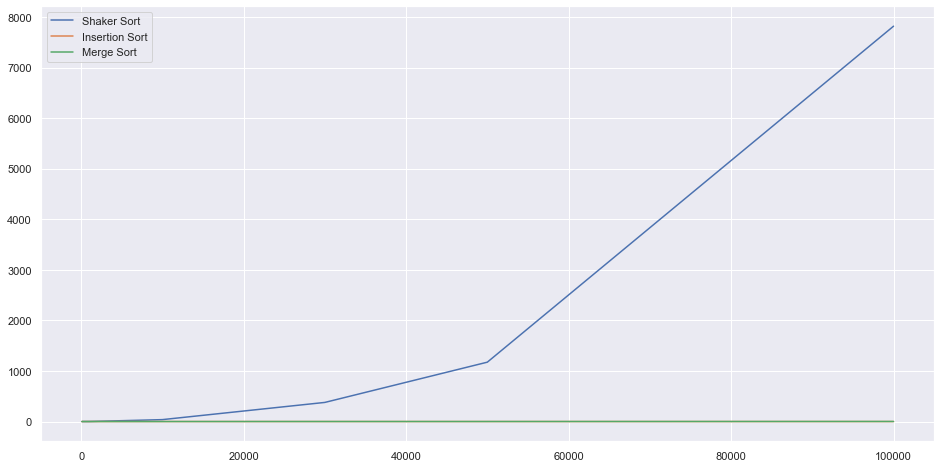

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(sizes_of_dataset, shaker_sort_time, label='Shaker Sort')
ax.plot(sizes_of_dataset, insertion_sort_time, label='Insertion Sort')
ax.plot(sizes_of_dataset, merge_sort_time, label='Merge Sort')
ax.legend()

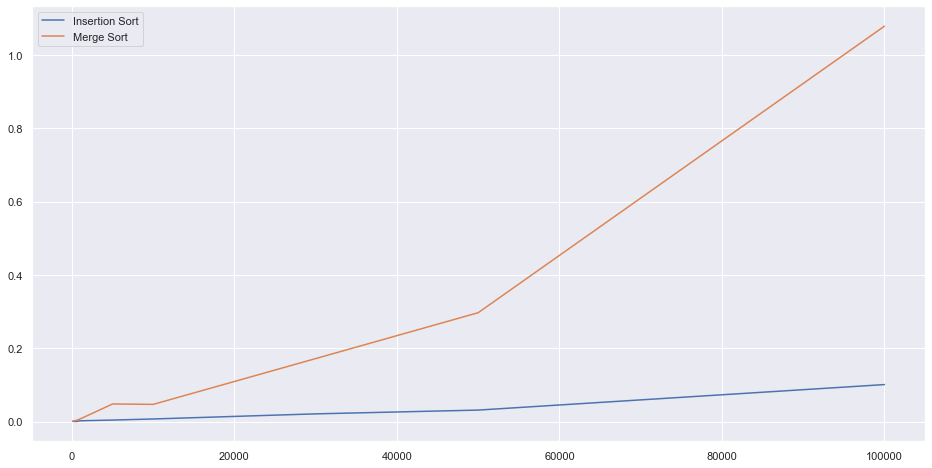

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(sizes_of_dataset, insertion_sort_time, label='Insertion Sort')
ax.plot(sizes_of_dataset, merge_sort_time, label='Merge Sort')
ax.legend()